# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: osarieme Ehimwenma

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
from typing import Union, Optional, Sequence

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 2_000

# Black code formatter (Optional)
#%load_ext lab_black
#%auto reload imports
%load_ext autoreload
%autoreload 2

In [2]:
def load_data(*, filename: str, sep: str = ",") -> pd.DataFrame:
    """This is just defined to load data
    
    Paramaters;
        filename (str): the filepath
        sep (str, default = ","): separators could also be ',', '\t', e.t.c
        
    Returns:
        data (pd.DataFrame): this is the loaded dataframe
    """
    
    data =pd.read_csv(filename)
    print(f"shape of data: {data.shape}\n")
    return data

In [3]:
#Load data
data = pd.read_csv("salary.csv")
print(f"shape of data: {data.shape}\n")

df = data.copy()

df.head(3)

shape of data: (32560, 15)



,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Final_weight    32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Country         32560 non-null  object
 14  Salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# data types
df.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [6]:
# checking for null values
df.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Gender: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [7]:
df.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Salary'],
      dtype='object')

## Exploratory Data Analysis

In [8]:
num_col = [(df.select_dtypes(include = np.number).columns)]
cat_col = [(df.select_dtypes(include = object).columns)]

In [9]:
cat_col = df.select_dtypes(include= object)
cat_col.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [10]:
num_col = df.select_dtypes(include= np.number)
num_col.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [11]:
for var in cat_col.columns:
    df[var] = cat_col[var].apply(lambda x: x.strip())

In [12]:
df.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
df.describe(include = object)

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [14]:
#df.drop(columns = "Education_num", inplace = True)

In [15]:
df["Salary"].unique()

array(['<=50K', '>50K'], dtype=object)

### graphical representation of the categorical variable


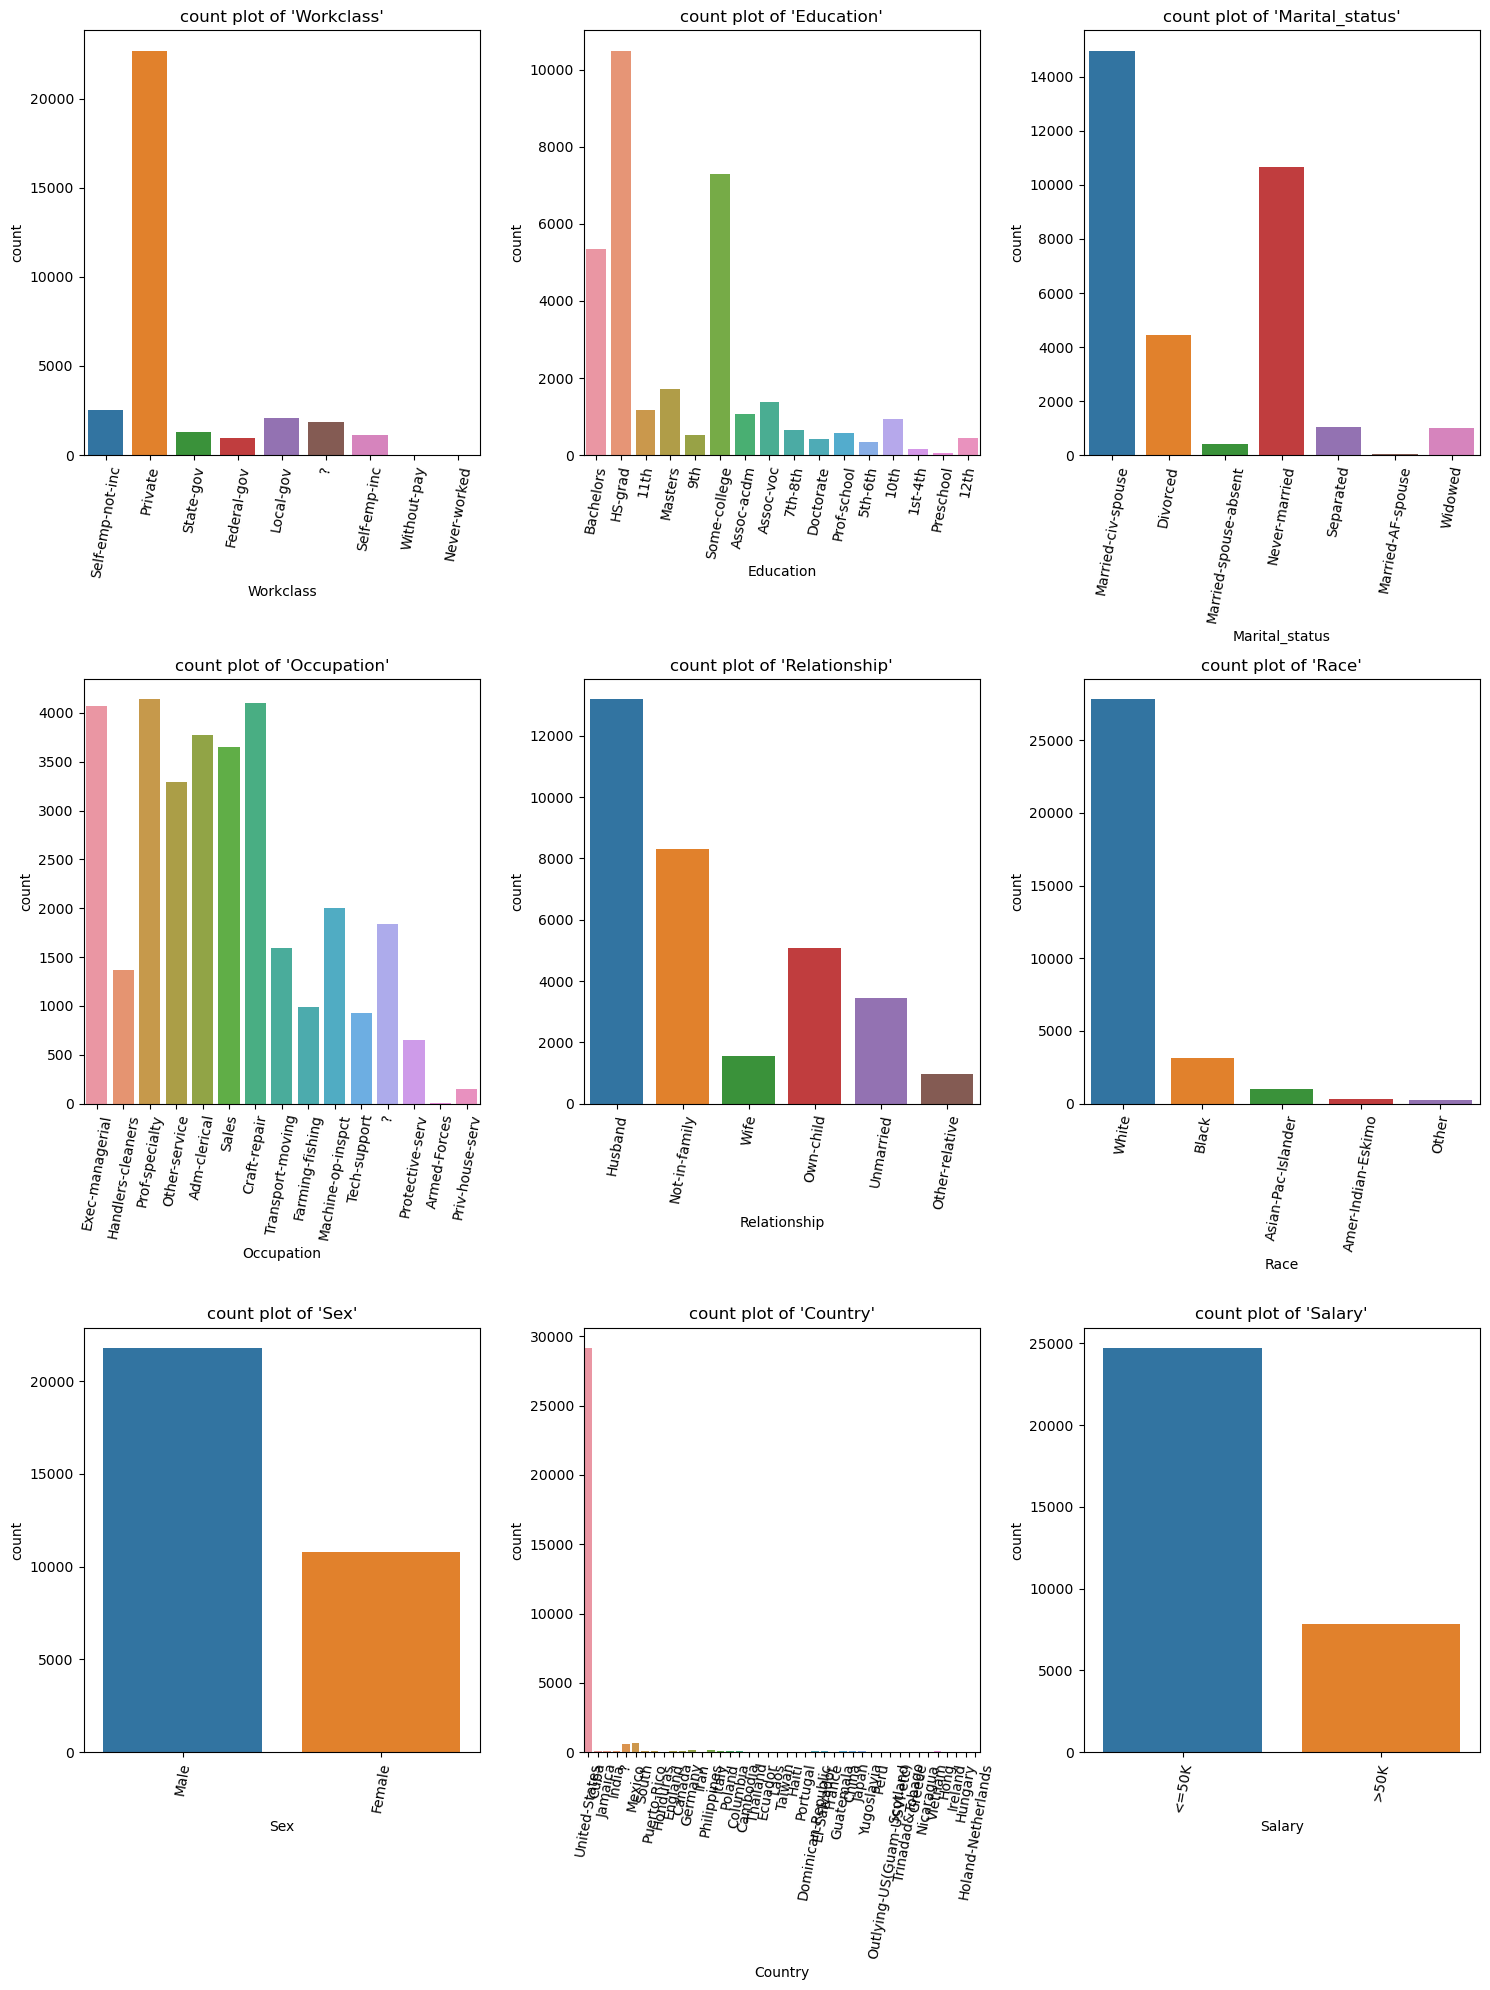

In [16]:
def plot(
    data: pd.DataFrame,
    figsize: tuple,
    rows: int,
    columns: int,
    features: list[str],
) -> 'Plot':
    """this returns all categorical variables"""
    fig, ax = plt.subplots(rows, columns, figsize = figsize)

    for i, var in enumerate(cat_col):

        plt.subplot(3,3, i+1)        
        sns.countplot(data = df, x = var)
        plt.title(f"count plot of {var!r}")

        labels = sorted(df[var].value_counts().index)
        plt.tick_params(axis = "x", rotation = 80)
        
    fig.tight_layout()
    plt.show()
        
plot(data = cat_col, figsize =(15,20), rows=3, columns =3, features = var)

## Insights

#### 1) workclass , country have features that rarely occurred or did not occur

#### 2) occupation, workclass, country has a feature labbelled as "?"

In [17]:
# replacing with most occurred

var = ["Workclass", "Occupation", "Country"]

for i in df[var]:
    occur = df[i].mode().values[0]
    df[i].replace("?", occur, inplace = True)

## Feature Selection

In [18]:
RANDOM_STATE = 123
TEST_SIZE = 0.2
TARGET = "Salary"

In [19]:
from sklearn.model_selection import train_test_split

# Independent variable (Matrix)
X = data.drop(columns=TARGET)

# Target variable (Vector)
y = data[TARGET]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

f"Independent Variable {X_train.shape}, {X_test.shape}; Target Variable {y_train.shape}, {y_test.shape}"

'Independent Variable (26048, 14), (6512, 14); Target Variable (26048,), (6512,)'

In [20]:
X_train.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country'],
      dtype='object')

## Feature Engineering

In [21]:
# from sklearn.preprocessing import LabelEncoder
# # it is used to encode target values
# le = LabelEncoder()
# le.fit (y_train)
# le.classes_

In [22]:
# le.fit_transform (y_train)

In [23]:
#from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler

# variables to scale
var_to_scale = ["Age",
"Final_weight",
"Capital_gain",
"Capital_loss",
"Hours_per_week"
]

#variable to encode
var_to_encode = ["Workclass",
"Education",
"Marital_status",
"Occupation",
"Relationship",
"Race",
"Sex",
"Country"                
]


# ===== OHE =====

# encoder = OrdinalEncoder(dtype=int, handle_unknown="error")
OHE = OneHotEncoder(dtype=int, handle_unknown="ignore")

# ===== Scaler =====

scaler = MinMaxScaler()

col_transformer = ColumnTransformer(transformers = [("scaler", scaler, var_to_scale),("OHE", OHE, var_to_encode)],
                                remainder = "passthrough"
                                   )

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight', 'Capital_gain',
                                  'Capital_loss', 'Hours_per_week']),
                                ('OHE',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Education', 'Marital_status',
                                  'Occupation', 'Relationship', 'Race', 'Sex',
                                  'Country'])])

In [24]:
workclass_ = ["Private", "Self-emp-inc", "Self-emp-not-inc", "State-gov", "Federal-gov", "Local-gov"]

education_ = ["Bachelors", "HS-grad", "Masters", "Some-college", "Assoc-acdm", "Assoc-voc",
             "Doctorate"]

Marital_status_ = ["Married-civ-spouse", "Divorced", "Never-married", "Separated", "Widowed"]

Occupation_ = ["Exec-managerial", "Prof-specialty", "Adm-clerical", "Sales", 
              "Craft-repair", "Transport-moving", "Machine-op-inspct",
              "Tech-support", "Protective-serv", "Armed-Forces"] 

Country_ = ["United-States", "England", "Canada", "Germany", "China"]
replace_val = "Others"

# ===== workclass =====
X_train["Workclass"] = np.where(
    X_train["Workclass"].isin(workclass_), X_train["Workclass"], replace_val
)

X_test["Workclass"] = np.where(
    X_test["Workclass"].isin(workclass_), X_test["Workclass"], replace_val
)

# ===== Education =====
X_train["Education"] = np.where(
    X_train["Education"].isin(workclass_), X_train["Education"], replace_val
)

X_test["Education"] = np.where(
    X_test["Education"].isin(workclass_), X_test["Education"], replace_val
)

# ===== Marital_status =====
X_train["Marital_status"] = np.where(
    X_train["Marital_status"].isin(Marital_status_), X_train["Marital_status"], replace_val
)

X_test["Marital_status"] = np.where(
    X_test["Marital_status"].isin(Marital_status_), X_test["Marital_status"], replace_val
)

# ===== Occupation =====
X_train["Occupation"] = np.where(
    X_train["Occupation"].isin(Occupation_), X_train["Occupation"], replace_val
)

X_test["Occupation"] = np.where(
    X_test["Occupation"].isin(Occupation_), X_test["Occupation"], replace_val
)

# ===== Country =====
X_train["Country"] = np.where(
    X_train["Country"].isin(Country_), X_train["Country"], replace_val
)

X_test["Country"] = np.where(
    X_test["Country"].isin(Country_), X_test["Country"], replace_val
)

In [25]:
X_train.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
6994,20,Others,168863,Others,10,Others,Others,Own-child,White,Female,0,0,20,Others
17064,22,Others,270436,Others,9,Others,Others,Own-child,White,Male,0,0,40,Others
18434,36,Others,405644,Others,9,Others,Others,Husband,White,Male,0,0,35,Others
3294,22,Others,51136,Others,10,Others,Others,Not-in-family,White,Female,0,0,60,Others
31316,23,Others,50953,Others,10,Others,Others,Not-in-family,White,Female,0,0,40,Others


In [26]:
trans = col_transformer.fit_transform(X_train)

In [27]:
transf = pd.DataFrame(trans, columns = col_transformer.get_feature_names_out())
transf.head()

,scaler__Age,scaler__Final_weight,scaler__Capital_gain,scaler__Capital_loss,scaler__Hours_per_week,OHE__Workclass_Others,OHE__Education_Others,OHE__Marital_status_Others,OHE__Occupation_Others,OHE__Relationship_ Husband,OHE__Relationship_ Not-in-family,OHE__Relationship_ Other-relative,OHE__Relationship_ Own-child,OHE__Relationship_ Unmarried,OHE__Relationship_ Wife,OHE__Race_ Amer-Indian-Eskimo,OHE__Race_ Asian-Pac-Islander,OHE__Race_ Black,OHE__Race_ Other,OHE__Race_ White,OHE__Sex_ Female,OHE__Sex_ Male,OHE__Country_Others,remainder__Education_num
0,0.041096,0.106341,0.0,0.0,0.193878,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,10.0
1,0.068493,0.175324,0.0,0.0,0.397959,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0
2,0.260274,0.267151,0.0,0.0,0.346939,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0
3,0.068493,0.026386,0.0,0.0,0.602041,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,10.0
4,0.082192,0.026262,0.0,0.0,0.397959,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,10.0


## Model Building using Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# Init
logit = LogisticRegression(max_iter = 2000, random_state=RANDOM_STATE)

pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week']),
                                                 ('OHE',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex',
                        

In [29]:
# Fit
pipe_logit.fit(X_train, y_train)

# Make predictions
y_pred= pipe_logit.predict(X_test)

# Probability for target variable
y_prob = pipe_logit.predict_proba(X_test)[:, 1]

In [30]:
y_test.value_counts(normalize=True)

 <=50K    0.763206
 >50K     0.236794
Name: Salary, dtype: float64

In [31]:
np.mean(y_test == y_pred)

0.8447481572481572

In [32]:
df["Salary"].unique()

array(['<=50K', '>50K'], dtype=object)

## Model Evaluation

## Confusion Matrix

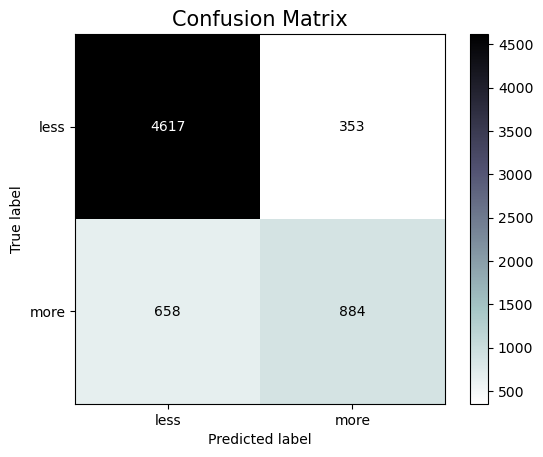

In [33]:
# Evaluate Model
labels = ["<=50K", ">50K"]
labels = ["less", "more"]


conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
disp.plot(cmap=plt.cm.bone_r)
plt.title("Confusion Matrix", size=15)
plt.show()

In [34]:
y_test.value_counts(normalize=True)

 <=50K    0.763206
 >50K     0.236794
Name: Salary, dtype: float64

### classification model

In [35]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4970
        >50K       0.71      0.57      0.64      1542

    accuracy                           0.84      6512
   macro avg       0.79      0.75      0.77      6512
weighted avg       0.84      0.84      0.84      6512



In [36]:
# Model 1
auc_score_1 = metrics.roc_auc_score(
    y_true=y_test, y_score=y_prob)
auc_score_1

0.8960716308225488

In [37]:
y_true = y_test

fpr, tpr, thresholds = metrics.roc_curve(
    y_test, y_prob, pos_label = " >50K")


auc_score = metrics.auc(fpr, tpr)
auc_score

0.8960716308225488

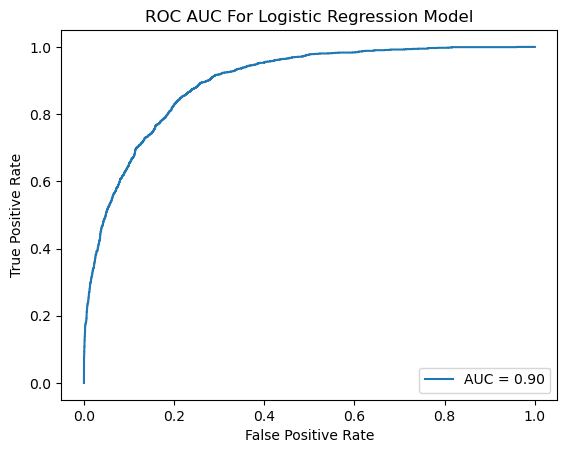

In [38]:
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_1, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Init
logit = LogisticRegression(random_state=RANDOM_STATE)

pipe_dec_tree = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_transformer),
        # ===== log Model =====
        ("logit", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

pipe_dec_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week']),
                                                 ('OHE',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex',
                        

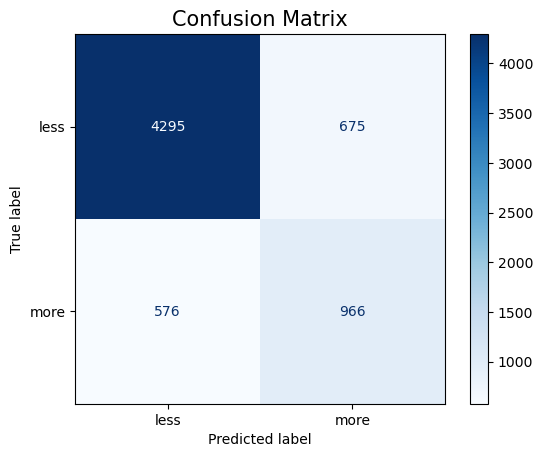

In [40]:
# Fit
pipe_dec_tree.fit(X_train, y_train)

# Make predictions
y_pred_2 = pipe_dec_tree.predict(X_test)

# Probability of Surviving
y_prob_2 = pipe_dec_tree.predict_proba(X_test)[:, 1]

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_2)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Display Confusion Matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()

In [41]:
clf_report = metrics.classification_report(y_true=y_test, y_pred=y_pred_2)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.88      0.86      0.87      4970
        >50K       0.59      0.63      0.61      1542

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.74      6512
weighted avg       0.81      0.81      0.81      6512



In [42]:
# Model 2
auc_score_2 = metrics.roc_auc_score(
    y_true=y_test, y_score=y_prob_2)
auc_score_2

0.7458449790833196

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(
    y_test, y_prob_2, pos_label = " >50K")


auc_score = metrics.auc(fpr, tpr)
auc_score

0.7458449790833196

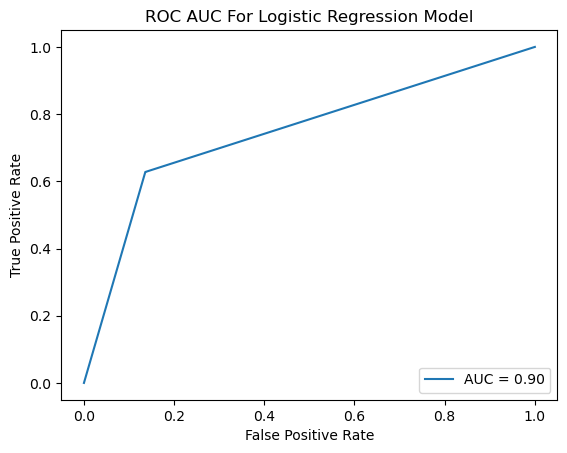

In [44]:
display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_1, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

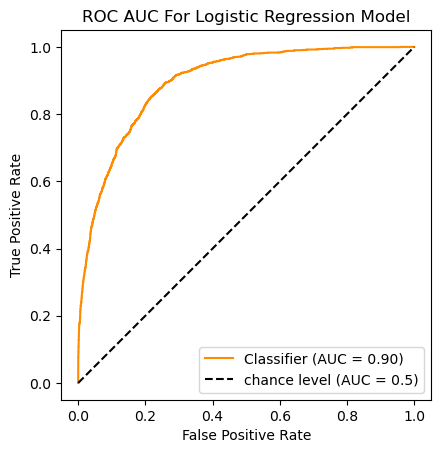

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=y_prob,
    color="darkorange",
    pos_label = " >50K"
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC For Logistic Regression Model")
plt.legend()
plt.show()

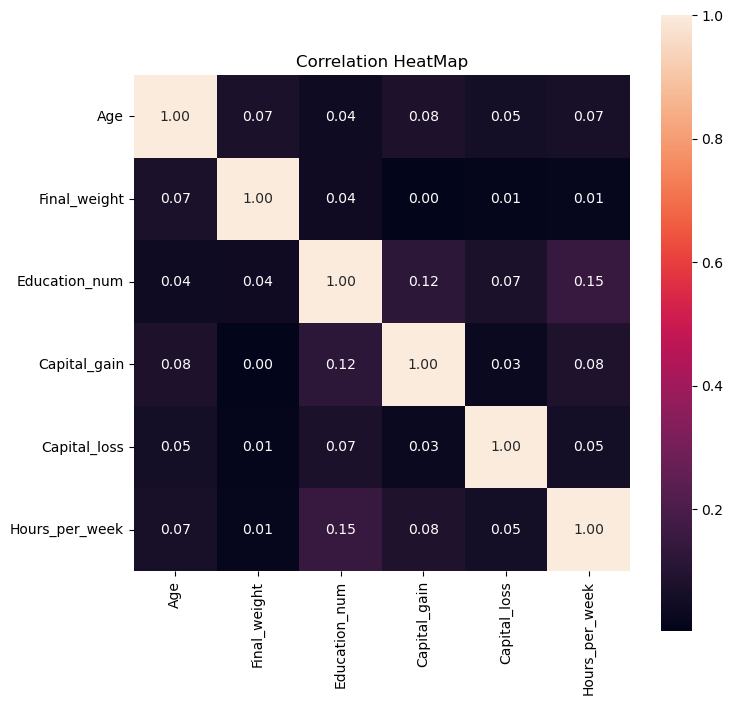

In [46]:
# correlation between the features
corr = X_train.corr().abs()

plt.figure(figsize = (8,8))
sns.heatmap(data = corr, annot = True, square = True, fmt = ".2f")
plt.title("Correlation HeatMap")
plt.show()

In [47]:
df.shape

(32560, 15)

In [48]:
df.loc[0]

Age                               50
Workclass           Self-emp-not-inc
Final_weight                   83311
Education                  Bachelors
Education_num                     13
Marital_status    Married-civ-spouse
Occupation           Exec-managerial
Relationship                 Husband
Race                           White
Sex                             Male
Capital_gain                       0
Capital_loss                       0
Hours_per_week                    13
Country                United-States
Salary                         <=50K
Name: 0, dtype: object

In [49]:
unseen_data = {
    "Age": 50,
    "Workclass": "Self-emp-not-inc",
    "Final_weight": 83311,
    "Education": "Bachelors",
    "Education_num": 13,                    
    "Marital_status": "Married-civ-spouse",
    "Occupation": "Exec-managerial",
    "Relationship": "Husband",
    "Race": "White",
    "Sex":  "Male",
    "Capital_gain": 0,
    "Capital_loss": 0,
    "Hours_per_week": 13,
    "Country": "United-States"
              }

df1 = pd.DataFrame(data = unseen_data, index = [0])
df1

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States


In [50]:
result = pipe_logit.predict(df1)[0]
(result)

' <=50K'

In [51]:
result = pipe_dec_tree.predict(df1)[0]
(result)

' <=50K'

In [52]:
df.loc[11722]

Age                               61
Workclass               Self-emp-inc
Final_weight                   61040
Education               Some-college
Education_num                     10
Marital_status    Married-civ-spouse
Occupation                     Sales
Relationship                 Husband
Race                           White
Sex                             Male
Capital_gain                    7688
Capital_loss                       0
Hours_per_week                    36
Country                United-States
Salary                          >50K
Name: 11722, dtype: object

In [53]:
unseen_data = {
    "Age": 61,
    "Workclass": "Self-emp-inc",
    "Final_weight": 61040,
    "Education": "Some-college",
    "Marital_status": "Married-civ-spouse",
    "Education_num": 10,
    "Occupation": "Sales",
    "Relationship": "Husband",
    "Race": "White",
    "Sex":  "Male",
    "Capital_gain": 7688,
    "Capital_loss": 0,
    "Hours_per_week": 36,
    "Country": "United-States"
              }

df2 = pd.DataFrame(data = unseen_data, index = [0])
df2

,Age,Workclass,Final_weight,Education,Marital_status,Education_num,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,61,Self-emp-inc,61040,Some-college,Married-civ-spouse,10,Sales,Husband,White,Male,7688,0,36,United-States


In [54]:
result = pipe_logit.predict(df2)[0]
(result)

' <=50K'

In [55]:
result = pipe_dec_tree.predict(df2)[0]
(result)

' >50K'

## insights
#### decision tree classifier predict right while logit classifier predicted <= 50K

In [56]:
df.loc[30024]

Age                             20
Workclass                  Private
Final_weight                137618
Education             Some-college
Education_num                   10
Marital_status       Never-married
Occupation        Transport-moving
Relationship             Own-child
Race                         White
Sex                           Male
Capital_gain                     0
Capital_loss                     0
Hours_per_week                  35
Country              United-States
Salary                       <=50K
Name: 30024, dtype: object

In [57]:
unseen_data = {
    "Age": 20,
    "Workclass": "Private",
    "Final_weight": 137618,
    "Education": "Some-college",
    "Education_num": 10,
    "Marital_status": "Never-married",
    "Occupation": "Transport-moving",
    "Relationship": "Own-child",
    "Race": "White",
    "Sex":  "Male",
    "Capital_gain": 0,
    "Capital_loss": 0,
    "Hours_per_week": 35,
    "Country": "United-States"
              }

df3 = pd.DataFrame(data = unseen_data, index = [0])
df3

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,20,Private,137618,Some-college,10,Never-married,Transport-moving,Own-child,White,Male,0,0,35,United-States


In [58]:
result = pipe_logit.predict(df3)[0]
(result)

' <=50K'

In [59]:
result = pipe_dec_tree.predict(df3)[0]
(result)

' <=50K'